## CIS 9
## Natural Language Processing with NLTK



Reading
<br>Natural Language Processing with Python: Learning to classify text, up to section 1.3

_Natural language_ is the language that humans use to communicate with each other. It's the language we use in our conversation or when we read and write texts, as opposed to computer languages.

_Natural Language Processing (NLP)_ or _Computational Linguistics_ is a field that uses computers to analyze, understand, and generate natural human language. NLP is used for tasks from counting word frequencies to allowing computers to interpret human commands to translating languages. NLP uses machine learning algorithms to build probabilistic model about a language.

Import libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk

### A. Common NLTK tools for pre-processing text
<br>Since texts are human readable words while machines only work with numbers, often in NLP we need to transform the text into meaningful numbers and possibly reduce the number of words in the text before we can use machine learning algorithms with the text. This is called pre-processing the text, and it's similar to the step in clasic machine learning where we change a feature description (with words) into a corresponding sequence of numbers, or when we use dimensional reduction to remove the number of irrelevant or duplicate features. 

1. __Tokenize__: separate the text into words or sentences. A sentence, paragraph, or an entire essay or writing is  made of words that give meaning to the text, so the dataset in NLP is generally the words in the text. A _tokenizer_ makes it simple to separate the text into words.

NTLK has many packages and not all available packages are downloaded by default, so we need to download and install the tokenizer the first time we use it. 
<br>(If you forget to comment out the download line of code after the first time, don't worry, the package manager is smart enough to figure out that you've downloaded it already.)

In [72]:
#nltk.download('punkt')     # only need to run this one time to download and install the package

In [73]:
# Sample line of text from python.org
s = '''Python is a programming language that lets you work quickly and integrate systems more effectively.
It's a programmer friendly language.'''  # adding a second line of text

In [98]:
from nltk.tokenize import word_tokenize   # separate text into words

words = word_tokenize(s)
print(words)

# a. How does this compare with Python string split() method?

['Python', 'is', 'a', 'programming', 'language', 'that', 'lets', 'you', 'work', 'quickly', 'and', 'integrate', 'systems', 'more', 'effectively', '.', 'It', "'s", 'a', '1', 'programmer', 'friendly', 'language', '.']


In [99]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
only_words = tokenizer.tokenize(s)
print(only_words)

# b. How is this list of words diferent from the previous list?

['Python', 'is', 'a', 'programming', 'language', 'that', 'lets', 'you', 'work', 'quickly', 'and', 'integrate', 'systems', 'more', 'effectively', 'It', 's', 'a', '1', 'programmer', 'friendly', 'language']


2. __Frequency distribution__: count of occurrences of words. Sometimes looking at the words that are most common in the text can give us some general idea about the text: is it casual or formal, what could be the main topics, etc.

In [76]:
freqD = nltk.FreqDist(only_words)
for key,val in freqD.items():
    print(str(key) + ':' + str(val))
print(len(freqD))

# We know enough Python to easily write the code for FreqDist, but it's nice to just call it

Python:1
is:1
a:2
programming:1
language:2
that:1
lets:1
you:1
work:1
quickly:1
and:1
integrate:1
systems:1
more:1
effectively:1
It:1
s:1
programmer:1
friendly:1
19


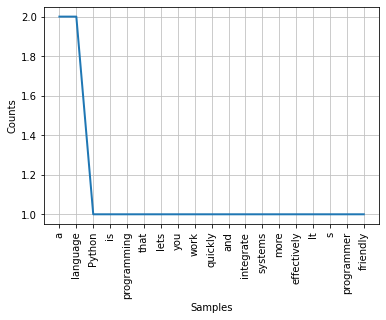

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [77]:
freqD.plot(20)    

# What happens when the input argument is 10?

3. __Stop words__: words that appear often in the text but don't necessarily help us find the meaning of the text. Example stop words are 'an', 'the', 'to', 'that'.
<br>Sometimes it's useful to remove the stop words because it can reduce the size of the datasets, making it faster to train the algorithm. But sometimes it's a bad idea to remove stop words if they actually have meaning in the text. For classification problems it's generally fine to remove the stop words.
<br>The list of stop words are different for different NLP tools, NLTK has different stop words than other tools.

We need to download and install the NLTK package for stopwords

In [78]:
# nltk.download('stopwords')      # only need to run this one time to download and install the package

In [79]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'been', "she's", 'himself', 'does', 'there', 'by', 'under', 'than', "that'll", 'didn', 'of', 'only', "it's", 'off', 'shouldn', 'yourself', "hasn't", 'my', 'because', 'very', "couldn't", 'wouldn', 'further', 'yourselves', 'we', 'all', 'it', 'had', 'when', "didn't", 'was', 'myself', 'themselves', 'won', 'his', 'him', 'be', 'hers', 'for', 'her', 'yours', "mustn't", 'into', 'this', 'its', 'll', 'needn', 'through', 'such', 'no', "wasn't", 'which', "you've", 'in', 'and', 'who', "shan't", 'she', 'mustn', 'has', 'weren', 'aren', 'to', 'but', 'between', 'that', 'itself', 'now', 'other', 'i', 'doesn', 'herself', 'couldn', 'will', 'at', "aren't", 'isn', "you're", 'have', 'your', 'do', 'until', 'm', 've', 'am', 'you', 'against', 'those', 'above', 'theirs', 'any', 'what', 'from', 'before', 'the', 'these', 'too', 'hadn', 'ain', 'same', 'how', "isn't", 're', "haven't", 'ours', 'so', 'should', "needn't", "should've", 'where', 's', "won't", 'after', 'o', 'just', 'he', 'a', 'on', 'more', 't', 'or', 'ov

In [80]:
# Create a list of words from only_words above, but with no stop words
noStopWords = [word for word in only_words if word not in stop_words ]
print("Words:",only_words)
print()
print("Without stop words:", noStopWords)

Words: ['Python', 'is', 'a', 'programming', 'language', 'that', 'lets', 'you', 'work', 'quickly', 'and', 'integrate', 'systems', 'more', 'effectively', 'It', 's', 'a', 'programmer', 'friendly', 'language']

Without stop words: ['Python', 'programming', 'language', 'lets', 'work', 'quickly', 'integrate', 'systems', 'effectively', 'It', 'programmer', 'friendly', 'language']


4. __Stemming__: removing parts of a word to get to its _stem_ or root. This can be useful to reduce the number of words we need to analyze. For example: 'talk', 'talking', 'talked', 'talks' all have the same stem 'talk' and perhaps can be grouped together. That way they are only counted once, or that way we can count their frequency as a group.

In [81]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed=[stemmer.stem(w) for w in only_words]
print("Words",only_words)
print()
print("Stems:",stemmed)

Words ['Python', 'is', 'a', 'programming', 'language', 'that', 'lets', 'you', 'work', 'quickly', 'and', 'integrate', 'systems', 'more', 'effectively', 'It', 's', 'a', 'programmer', 'friendly', 'language']

Stems: ['python', 'is', 'a', 'program', 'languag', 'that', 'let', 'you', 'work', 'quickli', 'and', 'integr', 'system', 'more', 'effect', 'It', 's', 'a', 'programm', 'friendli', 'languag']


5. __Part of speech (POS) tagging__: find the part of speech for each word. Sometime it's important to identify the part of speech of a word because it can make a difference in the meaning of a word. For example, 'drive' can be a verb in 'They drive fast', or 'drive' can be a noun in 'The drive was long and hot'.

We need to download and install the NLTK package for tagging POS

In [82]:
#nltk.download('averaged_perceptron_tagger')    # only need to run this one time to download and install the package
# The name perceptron hints at the fact that the tagger is done with a neural network. More on this later.

In [83]:
wordTags = nltk.pos_tag(only_words)   
print(wordTags)

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - '/Users/jakkus/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


The list of tags and their meanings are [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [ ]:
# From wordTags above, find all the verbs


### B. Text classification

We first explore NLTK's own machine learning algorithm, the Naive Bayes model, for text classification. Naive Bayes is one of the most common algorithm to use with text because it can be fairly accurate with the prediction without needing a large dataset. It was initially introduced for text classification tasks and is still used as a benchmark.

__Predicting names__
<br>We start with a simple learning algorithm that works with a list of people's first names and genders, then we train the algorithm to predict the gender of a person, given the person's name. In this simple case the names are one-word features and capitalized correctly, so we don't need to do any pre-processing of data. We don't need to:
- make the name case insensitive by converting them to lowercase
- tokenize the names since they are already single words
- the names are proper nouns so no need to remove stop words or reduce them to stems or determine the part of speech

In the English language, male first names and female first names tend to have different endings or different last letters. Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male. We will build a classifier to check the accuracy of predicting whether a name is male or female based on the last letter of the name.

6. Download and install the names library from NLTK 

In [ ]:
#nltk.download('names')    # (only need to run this one time to download and install

7. Get a list of male and female names from the NLTK library, assign labels to them, and randomize the order

In [ ]:
from nltk.corpus import names
 
names = ([(name, 'male') for name in names.words('male.txt')] +
         [(name, 'female') for name in names.words('female.txt')])
print(len(names))
print(names[:2], names[-2:])   # alphabetical order
random.shuffle(names)          # random order
print(names[:2], names[-2:])

8. The ntlk Naive Bayes model is trained with a _feature set_, which is a list of tuples, where each tuple is the input feature and corresponding output label.
<br>An input feature is a dictionary where the key is a short text description, and the value is a single boolean or integer (character). The labels can be text strings.

In [ ]:
def getFeature(word): 
    return {'lett': word[-1]}  # use last letter as feature

# Using the function getFeature above, create the list which is the feature set.
# The feature set is descrived in the previous cell


9. Split the dataset into a training and testing set, then use the training set to train the classifer

In [ ]:
from nltk.classify import NaiveBayesClassifier

train_set, test_set = train_test_split(featureSet,test_size=0.2)
print(len(train_set), len(test_set))
classifier = nltk.NaiveBayesClassifier.train(train_set)

10. Check the classifier accuracy

In [ ]:
nltk.classify.accuracy(classifier, test_set)

In [ ]:
classifier.show_most_informative_features(10)

__Bag of Words model__
<br>In this next example we work with a larger problem where we train a model to predict whether SMS messages are spam or not. Even though SMS messages are generally short, they are sentences with multiple words. This means the dataset is large and will need to be pre-processed before they are converted to numbers to work with a ML model.

A bag of words model is the simplest way to analyze data. It reduces the text to a container of words, without considering the order of the words or how the words are put together in a sentence (such as, is it part of a question or a statement or an exclamation). Only the number of occurrences or frequency of each word is counted.

Bag of words model is useful in classification to determine whether the text is a particular type of text.

11. Just like "Hello world" is the intro to programming, and "Ice cream sales" is the intro to machine learning, "Ham vs. spam" is the intro to NLP.
<br>We will try to classify whether an SMS is spam or ham (not spam). We use the input file _spam_short.csv_ from [source](https://www.kaggle.com/uciml/sms-spam-collection-dataset) that has been shortened to the first 1000 entries.

In [86]:
inputData = pd.read_csv('spam_short.csv', encoding='ISO-8859-1')   # Unicode characters
inputData.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


12. Remove the extra columns with NaN and change the column labels from 'v1' and 'v2' to 'label' and 'text'.
<br>Print the DataFrame

In [87]:
inputData.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
inputData.rename(columns = {"v1": "label", "v2": "text"}, inplace=True)
print(inputData)
inputData.shape

    label                                               text
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...
3     ham  U dun say so early hor... U c already then say...
4     ham  Nah I don't think he goes to usf, he lives aro...
..    ...                                                ...
994   ham                  I can't, I don't have her number!
995   ham    Change again... It's e one next to escalator...
996   ham  Yetunde i'm in class can you not run water on ...
997   ham  Not a lot has happened here. Feels very quiet....
998   ham  Then Ì_ wait 4 me at bus stop aft ur lect lar....

[999 rows x 2 columns]


(999, 2)

13. Create the y labels from the 'label' column and convert 'ham' to 0 and 'spam' to 1
<br>Show the size of y and the first few lines of y.

In [88]:
y = inputData.label
label={"ham":0, "spam":1}
y.replace(label, inplace=True)
print(y.head())
print(type(y))
y.shape

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64
<class 'pandas.core.series.Series'>


(999,)

14. Create the X Dataframe from the 'text' column.
<br>Print the size of X and the first few lines of X

In [174]:
X = inputData.drop(columns=["label"])
print(X.head())
print(X.shape)

                                                text
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
3  U dun say so early hor... U c already then say...
4  Nah I don't think he goes to usf, he lives aro...
(999, 1)


15. USe the pre-processing techniques in part A to reduce the X dataset:
- remove all numbers and punctuations (ony words with letters should remain)
- change all words to lowercase
- remove all stop words
- stem all words

In [184]:
# EC: write code to do the steps in Q15. 
# You should end up with an X DataFrame, name it X_processed
#X_processed = X["text"].str.split(" ", expand=True)

# from nltk.tokenize import RegexpTokenizer

# tokenizer = RegexpTokenizer('\w+')
# only_words = tokenizer.tokenize(s)

# X_processed = X["text"].apply(nltk.word_tokenize)
# X_processed
# X_processed = X["text"].apply(tokenizer.tokenize)
# X_processed["text"] = X["text"]
# print(X_processed.head())
# print(rem_num("abc123xyz"))
# print(X.head())
# print()



import string
def rem_punc(text):
    no_punc = "".join([c for c in text if c not in string.punctuation])
    return no_punc

def rem_num(text):
    no_punc = "".join([c for c in text if c not in string.digits])
    return no_punc
    

X_p = X["text"].apply(lambda x: rem_punc(x)).to_frame()
print(X_p.head())
print(X_p.shape)
print()
print()

X_proc = X_p["text"].apply(lambda x: rem_num(x)).to_frame()
print(X_proc.head())
print(X_proc.shape)
print()
print()

X_processed = X_proc["text"].apply(lambda x: x.lower()).to_frame()
print(X_processed.head())
print(X_processed.shape)
print()
print()

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
only_words = tokenizer.tokenize(s)
X_processed = X_processed["text"].apply(nltk.word_tokenize).to_frame()
print("--------------")
print(X_processed)
print(X_processed.shape)
print("--------------")
print()

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

def without_stop_words(l1):
    nostopwords = [word for word in l1 if word not in stop_words]
    return nostopwords

X_processed = X_processed["text"].apply(lambda x: without_stop_words(x)).to_frame()
print("####--------------###")
print(X_processed.head())
print(X_processed.shape)
print()
print()    
print("####--------------###")


from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def ret_stemmed(s1):
    stemmed=[stemmer.stem(w) for w in s1]
    return stemmed

X_processed = X_processed["text"].apply(lambda x: ret_stemmed(x)).to_frame()
print("!!!--------------!!!")
print(X_processed.head())
print(X_processed.shape)
print()
print()    
print("!!!--------------!!!")


# A = df = X_processed.to_frame()
# A.shape
# X_processed["text"] = X_processed["text"].apply(lambda x: rem_num(x))
# print(X_processed.head())
# print(X_processed.shape)

# X_processed = X["text"].apply(lambda x: x.lower())
# print(X_processed)
# X_xyx = X_processed.apply()
# # Working for lowering
# X_processed = X["text"].apply(lambda x: x.lower())
# print(X_processed)

                                                text
0  Go until jurong point crazy Available only in ...
1                            Ok lar Joking wif u oni
2  Free entry in 2 a wkly comp to win FA Cup fina...
3        U dun say so early hor U c already then say
4  Nah I dont think he goes to usf he lives aroun...
(999, 1)


                                                text
0  Go until jurong point crazy Available only in ...
1                            Ok lar Joking wif u oni
2  Free entry in  a wkly comp to win FA Cup final...
3        U dun say so early hor U c already then say
4  Nah I dont think he goes to usf he lives aroun...
(999, 1)


                                                text
0  go until jurong point crazy available only in ...
1                            ok lar joking wif u oni
2  free entry in  a wkly comp to win fa cup final...
3        u dun say so early hor u c already then say
4  nah i dont think he goes to usf he lives aroun...
(999, 1)


-------------

16. Transform each word into a document vector, which is a way to give a score to each word, by using the _CountVectorizer_
<br>The CountVectorizer counts the frequency of each word, and returns a vector of numbers (features) that can be used by a machine learning model

In [ ]:
# Example of how a CountVectorizer works

from sklearn.feature_extraction.text import CountVectorizer

text = ["The quick brown fox jumps over the lazy dog"]  # classic typing exercise
vectorizer = CountVectorizer()
vectorizer.fit(text)      
print("Frequency count:", vectorizer.vocabulary_)

vector = vectorizer.transform(text)   # output vector to be used by ML algorithms
print(vector.shape)
print(vector)
print(vectorizer.get_feature_names())

17. Now we apply CountVectorizer to our X_processed dataset

In [ ]:
vect = CountVectorizer()
vect.fit(X_processed[0])
X_vectors = vect.transform(X_processed[0])
print(X_vectors[0])
X_vectors.shape

18. Split the X_vectors and y datasets into training and testing sets and print the size of the sets.

In [ ]:

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

19. Recall that Multinomial Naive Bayes take each feature and its frequency into account to do output prediction, so it fits very well with the X_vectors. We train the classifier and test it.

20. Check the accuracy of the model and show the confusion matrix.

In [ ]:
# accuracy
print(metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

NLP is a big and challenging field because natural languages are messy, there are as many exceptions as there are rules in human languages, and languages evolve quickly. But it's also a field that is growing in importance with the pervasive role of social media and the advances of smart devices that interact us by using our human languages. 

_Optional_ note: We saw that the POS tagger is created from a neural network or perceptron. For those who are interested in reading an example of creating a neural network to do POS tagging, see this [article](https://becominghuman.ai/part-of-speech-tagging-tutorial-with-the-keras-deep-learning-library-d7f93fa05537)
<br>You'll recognize the same steps of: cleaning / pre-processing data, splitting the data into training and testing sets, creating a neural network, training the model, and evaluate the accuracy.